**In this case study, we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use k-Nearest Neighbors classification to determine whether or not other information about the wine helps us correctly guess whether a new wine will be of high quality.**
___

In [9]:
# import data
import pandas as pd
data = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

In [10]:
# drop redundant column
numeric_data = data.drop('color', 1)
numeric_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [12]:
import numpy as np
numeric_data = (numeric_data - np.mean(numeric_data, axis=0)) / np.std(numeric_data, axis=0)
numeric_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.75019,-0.494607
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,1.75019,-0.494607
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,1.75019,-0.494607
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,1.75019,-0.494607
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.75019,-0.494607


In [6]:
# standardize data
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()
numeric_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,1.750055,-0.494569
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157,1.750055,-0.494569
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157,1.750055,-0.494569
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983,1.750055,-0.494569
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,1.750055,-0.494569


In [13]:
# extract the first two principal components from the data
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit(numeric_data).transform(numeric_data)
principal_components

array([[-3.9084047 , -0.18449249],
       [-3.89513343, -0.70607703],
       [-3.85128606, -0.47524458],
       ..., 
       [ 0.8829393 ,  0.16735568],
       [ 1.55345604,  3.97949689],
       [ 1.3683117 ,  2.07368118]])

Populating the interactive namespace from numpy and matplotlib


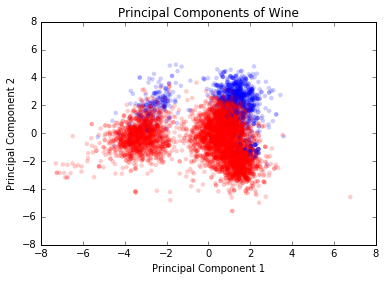

In [15]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:, 0]
y = principal_components[:, 1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1"); plt.ylabel("Principal Component 2")
plt.show()

In [28]:
def accuracy(predictions, outcomes):
    """takes two lists of the same size 
    returns percentage of elements that are equal for the two lists."""
    # Enter your code here!
    return np.mean(predictions == outcomes)
    

x = np.array([1, 2, 3])
y = np.array([1, 2, 4])
print(accuracy(x, y))

0.666666666667


In [29]:
# if we predict all wines are of low quality, we get the accuracy of:
print(accuracy(0, data["high_quality"]))

0.803447745113


In [30]:
# Use knn.predict to predict which wines are high and low quality 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])

library_predictions = knn.predict(numeric_data)
print(accuracy(library_predictions, data["high_quality"]))

0.999692165615


In [24]:
# randomly select 10 rows from the dataset using 
n_rows = data.shape[0]

import random
random.seed(123)
selection = random.sample(range(n_rows), 10)

In [25]:
# our knn implementation from the case study
import scipy.stats as ss

def distance(p1, p2):
    """
    Take in 2 points as np array
    Finds the distance between the 2 points
    """
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))
def majority_vote(votes):
    """
    Return the most common element in votes array.
    """   
    mode, count = ss.mstats.mode(votes)
    return mode[0]

def find_nearest_neighbors(points, p, k=5):
    """Find the k nearest neighbors of p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = (distance(points[i], p))
    return np.argsort(distances)[:k]

def knn_predict(points, p, outcomes, k=5):
    # find k nearest neighbors
    ind = find_nearest_neighbors(points, p, k)
    # predict the class of p based on majority vote
    return majority_vote(outcomes[ind])

In [31]:
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(data["high_quality"])

my_predictions = np.array([knn_predict(p, predictors[training_indices, :], outcomes, k=5) for p in predictors[selection]])
percentage = accuracy(my_predictions, data.high_quality[selection])
print(percentage)

0.8
